# Data Preprocessing

In [1]:
# import lightgbm as lgb
import pandas as pd
data = pd.read_csv('./Data/mro_daily_clean.csv', index_col=0)
data

,yr_nbr,mth_nbr,week_nbr,week_day,hard_braking,mild_hb,hard_braking2,harsh_hb,very_harsh_hb,est_hh_incm_prmr_cd,...,mro,record_days,latitude1,longitude1,purchase_lat1,purchase_lng1,purchase_yr_nbr,purchase_mth_nbr,tavg,random_avg_traffic
0,2019,3,13,7,0,0,0,0,0,6.0,...,0.0,70,45.0,-93.1,45.1,-93.2,2019.0,3.0,14.346983,12472.338289
1,2019,4,14,4,9,0,0,0,0,6.0,...,0.0,70,44.8,-92.9,45.1,-93.2,2019.0,3.0,13.670879,12410.618966
2,2019,4,14,6,9,1,0,0,0,6.0,...,0.0,70,44.8,-92.9,45.1,-93.2,2019.0,3.0,13.699830,12391.577959
3,2019,4,14,7,20,8,0,0,0,6.0,...,0.0,70,45.0,-93.1,45.1,-93.2,2019.0,3.0,13.704561,12313.165404
4,2019,4,15,4,0,0,0,0,0,6.0,...,0.0,70,45.0,-93.1,45.1,-93.2,2019.0,3.0,13.884265,12342.054130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18018968,2019,11,48,5,2,1,0,0,0,9.0,...,1.0,269,42.4,-82.9,42.4,-82.9,2018.0,6.0,12.700000,18816.070000
18018969,2019,12,49,5,1,0,0,0,0,9.0,...,0.0,269,42.4,-82.9,42.4,-82.9,2018.0,6.0,2.200000,6551.590000
18018970,2019,12,50,7,5,1,0,0,0,9.0,...,0.0,269,42.5,-82.9,42.4,-82.9,2018.0,6.0,-2.400000,15358.730000
18018971,2019,12,52,1,3,1,0,0,0,9.0,...,0.0,269,42.5,-82.9,42.4,-82.9,2018.0,6.0,5.600000,4082.580000


In [2]:
data_columns_name_lst = data.columns.tolist()
data_columns_lst_len = len(data_columns_name_lst)
print("The columns of the data are: ", data_columns_name_lst)
print("The number of columns of the data are: ", data_columns_lst_len)

The columns of the data are:  ['yr_nbr', 'mth_nbr', 'week_nbr', 'week_day', 'hard_braking', 'mild_hb', 'hard_braking2', 'harsh_hb', 'very_harsh_hb', 'est_hh_incm_prmr_cd', 'purchaser_age_at_tm_of_purch', 'input_indiv_gndr_prmr_cd', 'gmqualty_model', 'umf_xref_finc_gbl_trim', 'engn_size', 'hard_acceleration', 'mild_ha', 'harsh_ha', 'very_harsh_ha', 'vin_nbr_id', 'speeding_sum', 'speeding2_sum', 'day_mileage', 'id', 'day_indicator', 'service_days', 'battery_dummy', 'brake_dummy', 'tire_dummy', 'lof_dummy', 'wiper_dummy', 'filter_dummy', 'others', 'mro', 'record_days', 'latitude1', 'longitude1', 'purchase_lat1', 'purchase_lng1', 'purchase_yr_nbr', 'purchase_mth_nbr', 'tavg', 'random_avg_traffic']
The number of columns of the data are:  43


This dataset contains the following columns, which can be categorized into several groups:

1. Time-related Columns (4)
	* yr_nbr – Year of the event (e.g., 2023, 2024).
	* mth_nbr – Month of the event (ranging from 1 to 12).
	* week_nbr – Week number of the event (ranging from 1 to 52).
	* week_day – Day of the week when the event occurred (0 to 6 or 1 to 7, where 0 or 1 typically represents Monday).

2. Driving Behavior-related Columns (9)
	* hard_braking – Number or intensity of hard braking events.
	* mild_hb – Number or intensity of mild braking events.
	* hard_braking2 – Possibly another measure of hard braking events under different conditions.
	* harsh_hb – Number or intensity of harsh braking events.
	* very_harsh_hb – Number or intensity of very harsh braking events.
	* hard_acceleration – Number or intensity of hard acceleration events.
	* mild_ha – Number or intensity of mild acceleration events.
	* harsh_ha – Number or intensity of harsh acceleration events.
	* very_harsh_ha – Number or intensity of very harsh acceleration events.

3. Driver-related Columns (3)
	* est_hh_incm_prmr_cd – Estimated primary household income level or code of the driver.
	* purchaser_age_at_tm_of_purch – Age of the purchaser at the time of purchase.
	* input_indiv_gndr_prmr_cd – Gender code of the driver (e.g., M for male, F for female).

4. Vehicle Information-related Columns (4)
	* gmqualty_model – Vehicle model or quality classification.
	* umf_xref_finc_gbl_trim – Vehicle configuration or trim level.
	* engn_size – Engine size (likely in liters or cubic centimeters).
	* vin_nbr_id – Vehicle Identification Number (VIN).

5. Speed and Mileage-related Columns (3)
	* speeding_sum – Total number of speeding events or total distance driven while speeding.
	* speeding2_sum – Possibly another measure of speeding events (e.g., separating highway and urban driving).
	* day_mileage – Daily driving mileage (likely in kilometers or miles).

6. Service and Maintenance-related Columns (9)
	* service_days – Total number of days the vehicle received maintenance or service.
	* battery_dummy – Indicator for battery service (1 = serviced, 0 = not serviced).
	* brake_dummy – Indicator for brake service.
	* tire_dummy – Indicator for tire service.
	* lof_dummy – Indicator for lube, oil, and filter service.
	* wiper_dummy – Indicator for wiper service.
	* filter_dummy – Indicator for air or oil filter service.
	* others – Indicator for other types of service.
	* **mro – Maintenance, repair, and overhaul**, a bool target.

7. Record-related Columns (3)
	* id – Unique identifier for the record.
	* day_indicator – Indicator for the specific day of the record (e.g., 1 for current day).
	* record_days – Total number of days of recorded data.

8. Geographic Information-related Columns (4)
	* latitude1 – Latitude of the vehicle’s location.
	* longitude1 – Longitude of the vehicle’s location.
	* purchase_lat1 – Latitude of the purchase location.
	* purchase_lng1 – Longitude of the purchase location.

9. Purchase Time-related Columns (2)
	* purchase_yr_nbr – Year of vehicle purchase.
	* purchase_mth_nbr – Month of vehicle purchase.

10. External Environment-related Columns (2)
	* tavg – Average temperature (likely in degrees Celsius or Fahrenheit).
	* random_avg_traffic – Randomly sampled average traffic flow (may indicate traffic congestion level).

## Check Missing Values

In [3]:
# check the missing value in data
data.isnull().sum()

yr_nbr                          0
mth_nbr                         0
week_nbr                        0
week_day                        0
hard_braking                    0
mild_hb                         0
hard_braking2                   0
harsh_hb                        0
very_harsh_hb                   0
est_hh_incm_prmr_cd             0
purchaser_age_at_tm_of_purch    0
input_indiv_gndr_prmr_cd        0
gmqualty_model                  0
umf_xref_finc_gbl_trim          0
engn_size                       0
hard_acceleration               0
mild_ha                         0
harsh_ha                        0
very_harsh_ha                   0
vin_nbr_id                      0
speeding_sum                    0
speeding2_sum                   0
day_mileage                     0
id                              0
day_indicator                   0
service_days                    0
battery_dummy                   0
brake_dummy                     0
tire_dummy                      0
lof_dummy     

## Discussion: If We Need to Re-define MRO?

In [4]:
# 'battery_dummy', 'brake_dummy','tire_dummy', 'lof_dummy', 'wiper_dummy', 'filter_dummy', 'others'
battery_dummy_sum = data[['battery_dummy']].sum().values[0]
print("The proportion of battery_dummy is: ", battery_dummy_sum)
brake_dummy_sum = data[['brake_dummy']].sum().values[0]
print("The proportion of brake_dummy is: ", brake_dummy_sum)
tire_dummy_sum = data[['tire_dummy']].sum().values[0]
print("The proportion of tire_dummy is: ", tire_dummy_sum)
lof_dummy_sum = data[['lof_dummy']].sum().values[0]
print("The proportion of lof_dummy is: ", lof_dummy_sum)
wiper_dummy_sum = data[['wiper_dummy']].sum().values[0]
print("The proportion of wiper_dummy is: ", wiper_dummy_sum)
filter_dummy_sum = data[['filter_dummy']].sum().values[0]
print("The proportion of filter_dummy is: ", filter_dummy_sum)
others_sum = data[['others']].sum().values[0]
print("The proportion of others is: ", others_sum)

The proportion of battery_dummy is:  760.0
The proportion of brake_dummy is:  320.0
The proportion of tire_dummy is:  3557.0
The proportion of lof_dummy is:  121178.0
The proportion of wiper_dummy is:  993.0
The proportion of filter_dummy is:  3780.0
The proportion of others is:  69880.0


In [5]:
# 'battery_dummy', 'brake_dummy','tire_dummy', 'lof_dummy', 'wiper_dummy', 'filter_dummy', 'others'
data["mro_new"] = (
    data["brake_dummy"]
    + data["battery_dummy"]
    + data["tire_dummy"]
    + data["lof_dummy"]
    + data["wiper_dummy"]
    + data["filter_dummy"]
    + data["others"]
)

In [6]:
print('The number of mro_new is: ', data['mro_new'].nunique())
print('The value counts of mro_new is:\n', data['mro_new'].value_counts())

The number of mro_new is:  5
The value counts of mro_new is:
 mro_new
0.0    17823554
1.0      190618
2.0        4562
3.0         230
4.0           9
Name: count, dtype: int64


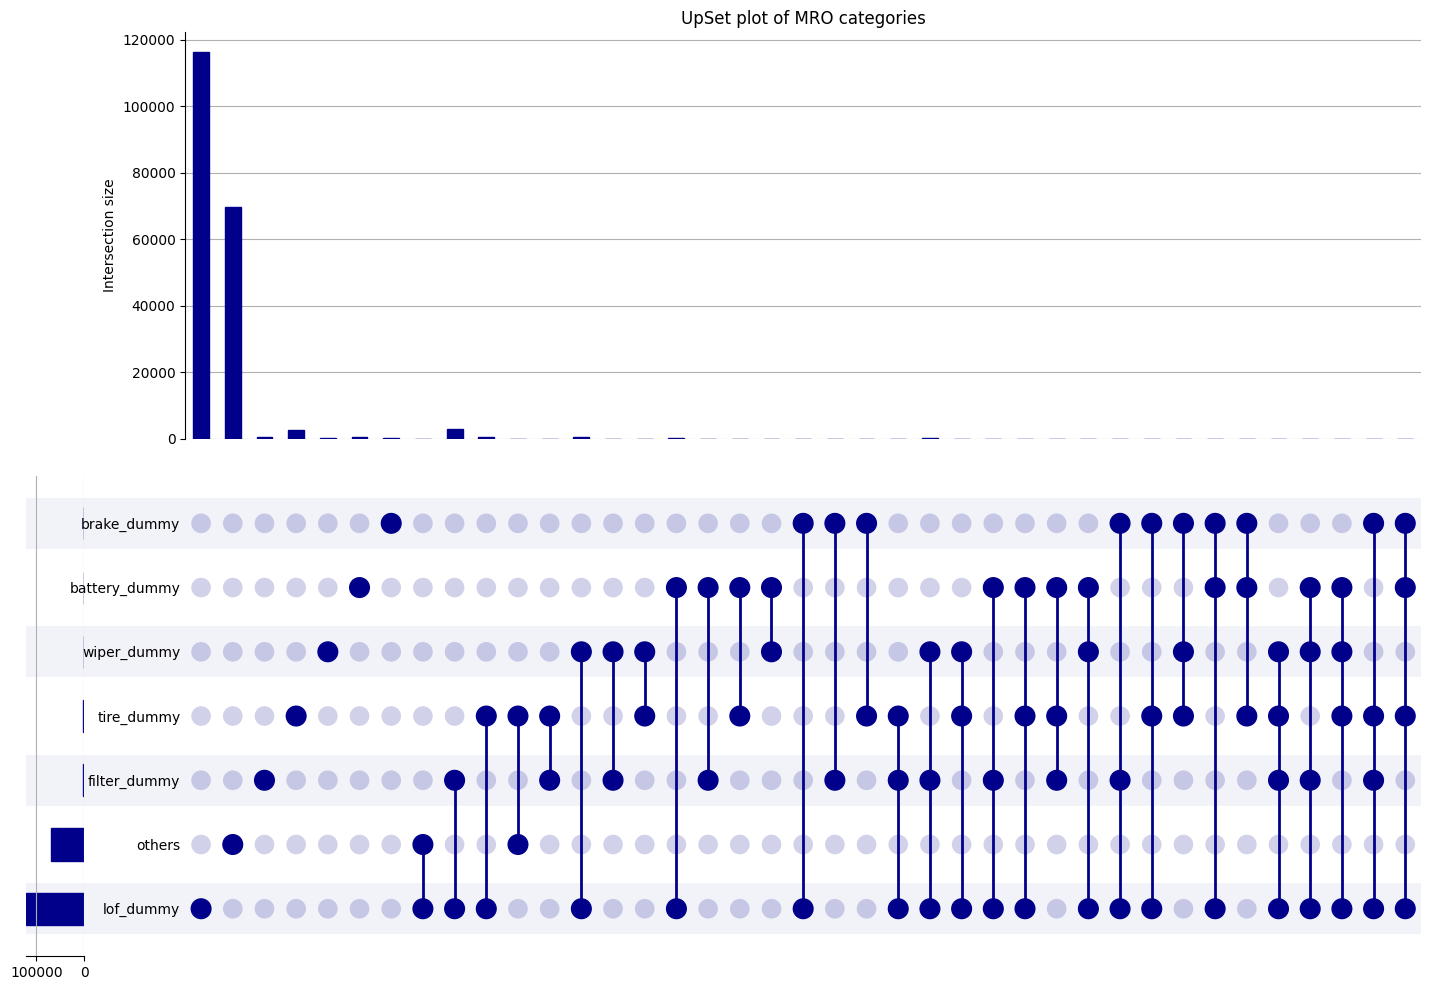

In [7]:
from matplotlib import pyplot as plt
from upsetplot import from_indicators, plot
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
# create a new data frame for UpSet plot with the columns of interest only
# transform the data type to boolean
df = data[
    [
        "battery_dummy",
        "brake_dummy",
        "tire_dummy",
        "lof_dummy",
        "wiper_dummy",
        "filter_dummy",
        "others",
    ]
]
# remove rows with all zeros and transform the data type to boolean
df = df[df.any(axis=1)].astype(bool)

# create the UpSet plot
upset_data = from_indicators(df.columns, df)
fig = plt.figure(figsize=(18, 12))
plot(
    upset_data,
    fig=fig,
    element_size=None,
    orientation="horizontal",
    facecolor="darkblue",
)
plt.title("UpSet plot of MRO categories")
plt.show()

## Data Transfermation

Combine `purchase_yr_nbr` and `purchase_mth_nbr` to make a new colomn standing for the `purchase_time`

In [16]:
data["purchase_time"] = (
    data["purchase_yr_nbr"].astype(int).astype(str)
    + "_"
    + data["purchase_mth_nbr"].astype(int).astype(str)
)

Robustness check: divide into `repair`/`maintenance`

In [ ]:
import numpy as np

# TODO: I don't know why we need to add this line
data["maintenance"] = np.where((data["mro"] == 1) & (data["service_days"] <= 3), 1, 0)
data["repair"] = np.where((data["mro"] == 1) & (data["service_days"] > 3), 1, 0)

Robustness check: `traffic density`

In [23]:
data["traffic_count"] = data.groupby(
    ["yr_nbr", "mth_nbr", "week_nbr", "week_day", "latitude1", "longitude1"]
)["yr_nbr"].transform("size")

## Feature Selection

In [24]:
data.columns

Index(['yr_nbr', 'mth_nbr', 'week_nbr', 'week_day', 'hard_braking', 'mild_hb',
       'hard_braking2', 'harsh_hb', 'very_harsh_hb', 'est_hh_incm_prmr_cd',
       'purchaser_age_at_tm_of_purch', 'input_indiv_gndr_prmr_cd',
       'gmqualty_model', 'umf_xref_finc_gbl_trim', 'engn_size',
       'hard_acceleration', 'mild_ha', 'harsh_ha', 'very_harsh_ha',
       'vin_nbr_id', 'speeding_sum', 'speeding2_sum', 'day_mileage', 'id',
       'day_indicator', 'service_days', 'battery_dummy', 'brake_dummy',
       'tire_dummy', 'lof_dummy', 'wiper_dummy', 'filter_dummy', 'others',
       'mro', 'record_days', 'latitude1', 'longitude1', 'purchase_lat1',
       'purchase_lng1', 'purchase_yr_nbr', 'purchase_mth_nbr', 'tavg',
       'random_avg_traffic', 'mro_new', 'purchase_time', 'maintenance',
       'repair', 'traffic_count'],
      dtype='object')

In [25]:
data

,yr_nbr,mth_nbr,week_nbr,week_day,hard_braking,mild_hb,hard_braking2,harsh_hb,very_harsh_hb,est_hh_incm_prmr_cd,...,purchase_lng1,purchase_yr_nbr,purchase_mth_nbr,tavg,random_avg_traffic,mro_new,purchase_time,maintenance,repair,traffic_count
0,2019,3,13,7,0,0,0,0,0,6.0,...,-93.2,2019.0,3.0,14.346983,12472.338289,0.0,2019_3,0,0,12
1,2019,4,14,4,9,0,0,0,0,6.0,...,-93.2,2019.0,3.0,13.670879,12410.618966,0.0,2019_3,0,0,5
2,2019,4,14,6,9,1,0,0,0,6.0,...,-93.2,2019.0,3.0,13.699830,12391.577959,0.0,2019_3,0,0,11
3,2019,4,14,7,20,8,0,0,0,6.0,...,-93.2,2019.0,3.0,13.704561,12313.165404,0.0,2019_3,0,0,13
4,2019,4,15,4,0,0,0,0,0,6.0,...,-93.2,2019.0,3.0,13.884265,12342.054130,0.0,2019_3,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18018968,2019,11,48,5,2,1,0,0,0,9.0,...,-82.9,2018.0,6.0,12.700000,18816.070000,3.0,2018_6,1,0,47
18018969,2019,12,49,5,1,0,0,0,0,9.0,...,-82.9,2018.0,6.0,2.200000,6551.590000,0.0,2018_6,0,0,55
18018970,2019,12,50,7,5,1,0,0,0,9.0,...,-82.9,2018.0,6.0,-2.400000,15358.730000,0.0,2018_6,0,0,134
18018971,2019,12,52,1,3,1,0,0,0,9.0,...,-82.9,2018.0,6.0,5.600000,4082.580000,0.0,2018_6,0,0,128


In [12]:
time_info = ["yr_nbr", "mth_nbr", "week_nbr", "week_day"]
driver_behavior = [
    "hard_braking",
    "mild_hb",
    "hard_braking2",
    "harsh_hb",
    "very_harsh_hb",
]
